In [1]:
# Import image library
from IPython.display import Image

# Supervise Learning

- SL algorithms are trained using labelled input where the desired output is known e.g emails are already classified as legitimate or spam.
- Using this historical data an ML algorithm / network can learn and then predict which 'label' category future data belongs to.
- The network receives the data to predict outputs for alongside with the desired output, so as to compare its output against the correct ouptuts, to find prediction errors. then modifies its prediction model accordingly.
- This algorithm id commonly used where historical events likely predict, future events.

### The SL Workflow
- Developing a SL prediction model involves the following steps:

    1. Acquire the data from people(customer surveys), machines(sensors), web(scrapping) etc
    2. Clean the data using tools like Pandas
    3. Split the cleaned data i.e 30% (used to test the SL model) vs 70% (used to train the SL model)
    4. Train and build the model by fit the model to the trainig data.
    5. Run the test data through the model to compare it against the test data which has the desired output.
    6. Adjust the model params to fine tune the model prediction.
    7. Deploy the model to production if it performs accordingly.

- In the real world, its not feasible to measure the true production performace of the SL model using the same data set that is used to train and refine the model. To get around this problem, the data set is actually split into 3:

    1. Training Data: used to train and build the model
    2. Validation Data: used to refine the model, by determining what model hyperparameters to adjust
    3. Test Data (x_test): This usually unseen by the model throughout the first two steps above and is used as the final test of performance. The model results are compared to the correct labels (true y_test) values to evaluate the model performance. After this stage we can't refine the model anymore because this test is best peformed with unseen data for true model performance evalaution.

_See process diagram: Lecture 79 (3.47)_

### Evaluating Model Performance - Classification Error Metrics
- At the end of the model testing stage above, we will need to determine if the model performed as expected, by comparing the count of correct and incorrect matches made by the model and calculating some error performance metrics.
- However, not all incorrect or correct matches have equal value and we may need to organize the outcome predictions in a _confusion matrix_ to gain further insight.
- Model evaluation is based on two outcomes:

    1. Correct prediction of the desired output (1)
    2. Incorrect prediction (0)

- Model performance evaluation classification can be binary with only two classes i.e correct prediction of one or the other class.
- The above classification being the foundation, can be expanded to include multiple classes e.g correct prediction of a category among more than two categories or incorrect prediction of the same.
- The error performance metrics used to evaluate model performance are:

    1. Accuracy: This metric is useful when the target classes are well balanced i.e predicting either cat or dog images, then we have roughly the same amount of images for both categories/classes. For unbalanced classes, the model will not be accurate due to the biased nature of the training data e.g 99 images of a dog vs 1 of a cat.
$$Accuracy = {{number Of Correct Predictions Made}\over total Number Of Predictions}$$

    2. Recall: ability of the mode to find all the relevant cases within a dataset.    
$$Recall = {{number Of True Positives}\over number Of True Positives + number Of False Negatives}$$  
    
    3. Precision: ability of a classification model to ID only the relevant data points.
$$Precision = {{number of true positives}\over number of true positives + number of false positives}$$
    _Recall and Precision trade-off: while recall expresses the ability to find all revelant instances in the dataset, precision expresses the proportion of the data points the model says was relevant that was actually relevant_
    
    4. F1-Score: a combination of 2 & 3 above, and is the harmonic mean of the precision and the recall
$$F_1 = 2 * {{precision * recall}\over precision + recall}$$   
    _F1-score is preferred over a simple mean, as it 'punishes' extreme values e.g precision = 1.0 and recall = 0.0, where a simple mean would yield 0.5 but the f1-score for these values would be 0.0._

## Confusion Matrix
- A method for evaluating classification performnce of a model preditions as shown below:

|Sample Size|Positive Prediction|Negative Prediction|
|:---:|:---:|:---:|
|Actual Positive|True +ve|(False -ve:type 2 error)|
|Actual Negative|(False +ve:type 1 error)|True -ve|


- Where true positives and true negative are correct predictions, while false positives are predictions where no prediction is the correct value and false negatives are NO predictions where a prediction is the correct value.
- From the above, we can go further to claculate other metrics as shown in _Lecture 79 (10.56)_
- A good enough accuracy depends on the context of the situation i.e is the data balanced? what is at stake? - if the stakes are high then we should focus on minimizing false negatives which has a trade-off of increasing false positives but which can be eliminated on a deeper consequent test e.g diagnosing presence of a disease. ML is collaborative in trying to achieve accuracy i.e by involving field experts so as to cater for these edge cases.

### Evaluating Model Performance - Regression Error Metrics
- Regression is attempting to predict continious values unlike categorical values as mentioned above e.g attempting to predict the price of a house given its features compared to attempting to predict the location of the  house given its features, which would be classification.
- Therefore we need metrics best suited for regression tasks and the most common are:

    1. Mean Absolute Error: which is the mean of the absolute value of errors
$$MAE = {{1}\over n}\sum_i^n 1 | y_i - \bar y_i |$$ $$Where: y=actualVals,  \bar y= predictedVals$$

_The problem with MAE is it won't punish extreme error values/outliers, which brings us to the next metric, preferred due to this shortfall_

    2. Mean Squared Error: by deriving the mean of the squared error, outliers are more noticeable
$$MSE = {{1}\over n}\sum_i^n 1 (y_i - \bar y_i)^2$$

_With MAE, the error value is in the same units as the values under investigation e.g prices but with MSE, the error value is sqaured making it abit difficult to interpret, which brings us to the next preffered metric that overcomes both shortfalls encountered thus far_

    3. Root Mean Sqaure Error: which basicall takes the sqaure root of the the MSE
$$MSE = \sqrt{{{1}\over n}\sum_i^n 1 (y_i - \bar y_i)^2}$$


_As with all error evaluations the context is key to determing the acceptable ranges and in this case, comparing the error value to the mean of the label in the data set e.g price of the house will guide the error value's acceptability as well as consulting with a domain expert who can alos inform on the error's acceptability._

### Scikit Learn
- Is the most popular mL package for python and comes bundled with alot of ML algorithms.
- The process to use with Scikit learn are:

    1. Every algorithm is exposed via an estimator e.g LinearRegression which will need to imported into your project and instantiated to create the ML model e.g

    `from sklearn.linear_model import LinearRegression`
    
    `model = LinearRegression(_add non-default parameters_)`
    
    2. The data needs to be split into training & test data using Scikit Learn's train_test_split library (Lecture 81 (3.46))

    3. Next is to train/ fit the ML model created above on the training data, using the model.fit() e.g

    `model.fit(X_train, y_train)` where X_train and y_train are the training data sets.

    4. After the model has been trained, we can get predictions from it, using the test data on the model.predict() method:

    `predictions = model.predict(X_test)`

    5. Finally we evaluate the model by comparing its predictions vs the correct values /labels. The evaluation method depends on the ML algorithm used e.g regression, classification, clustering etc

_For supervised learning the estimator objects accept an X and Y label where X are the feature data and Y are the data label ie. if you see X it is Y. For unsupervised learning the estimator objects only accept the feature data X since the data is unlabelled._

- More methods for both supervised & unsupervised estimator object introduced in Lecure 81 (6.19)

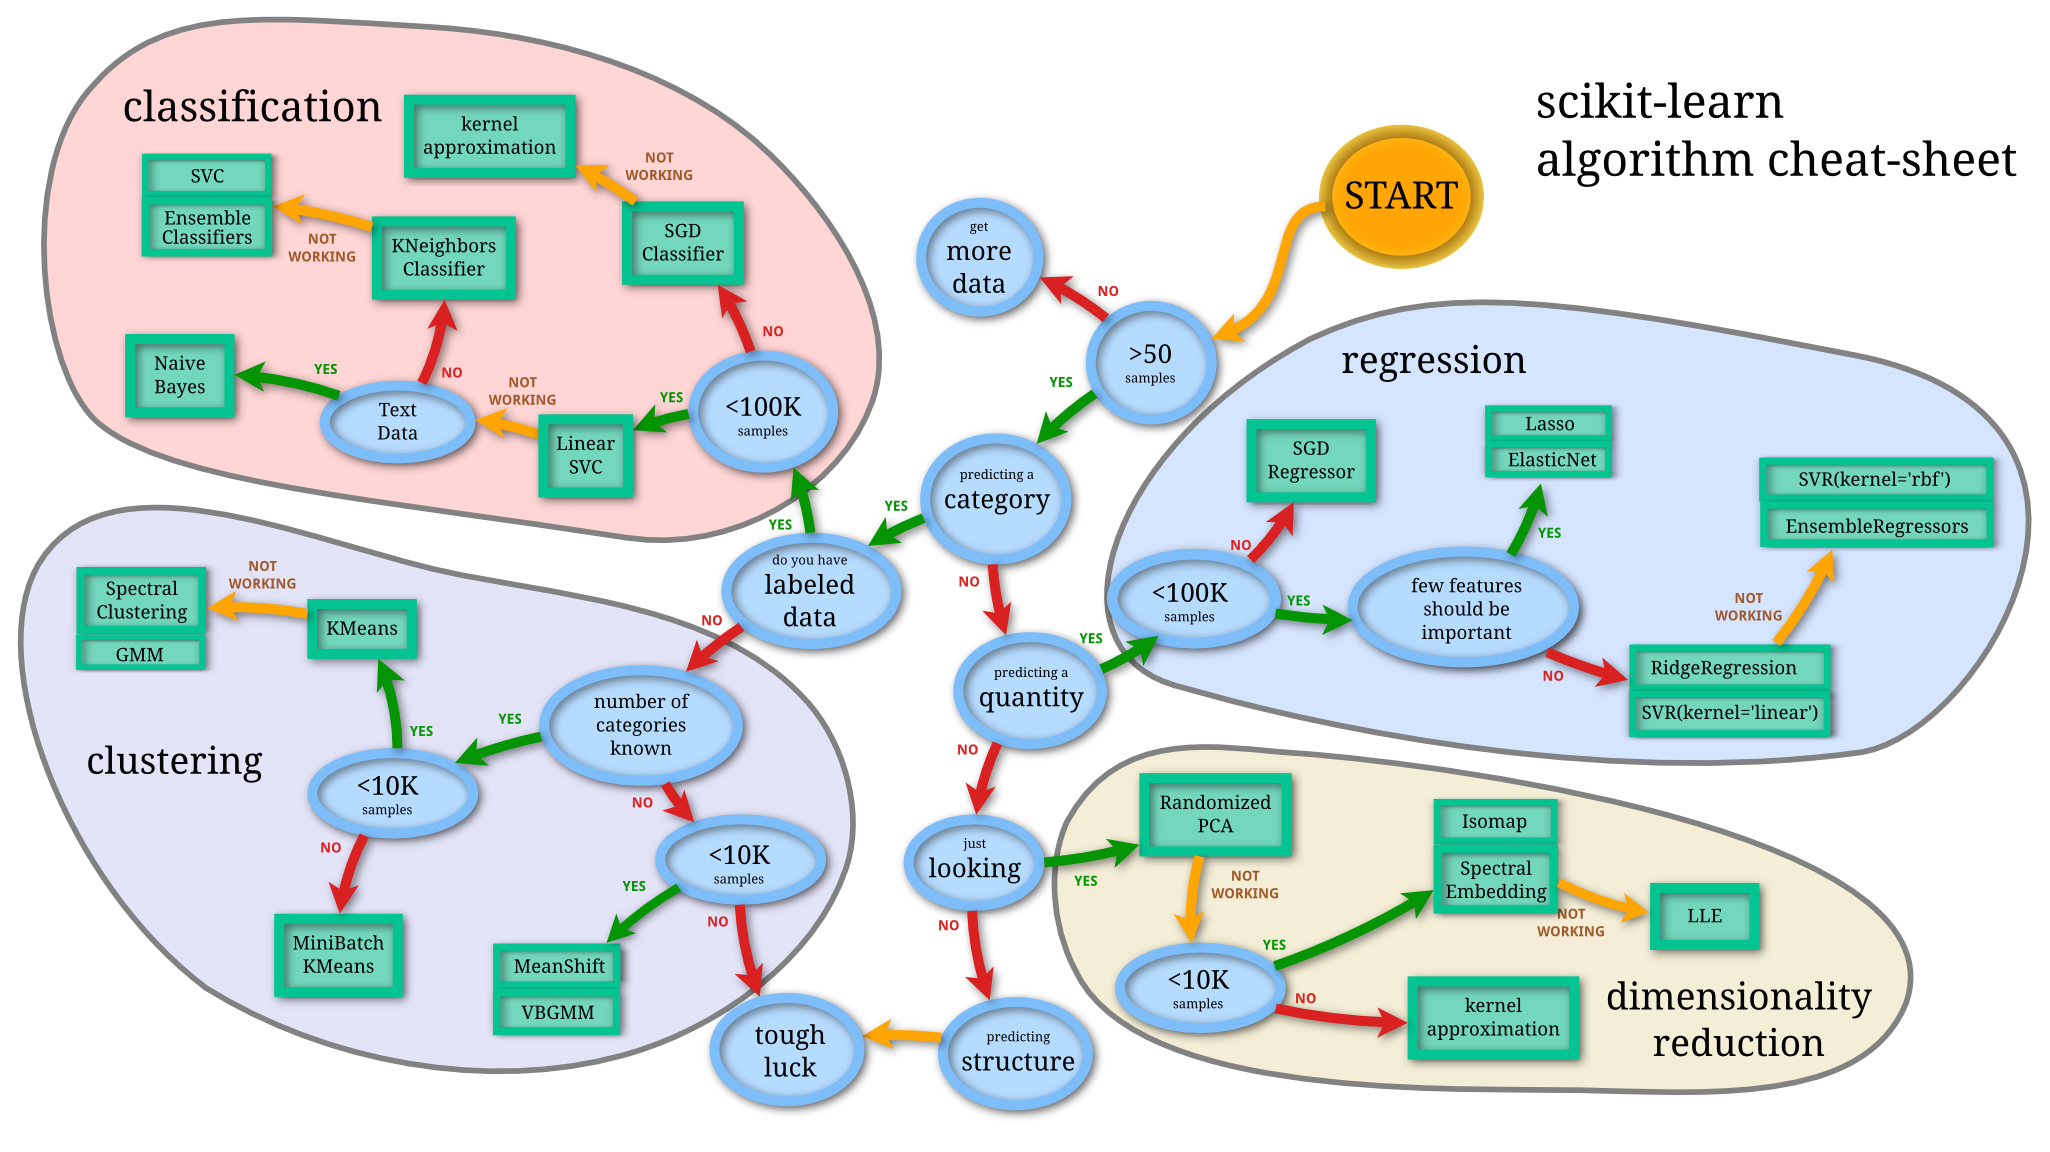

In [1]:
# Choosing an ML algorithm
Image("scikit-learn-cheatsheet.png")

### Linear Regression
- Regression is the tendancy for a prediction to drift towards the mean of population observations.
- A regresion line (line of best fit) is calculated from a observation data and this line can then be used to predict other related data.
- The regresion line is determined by minimizing the vertical deviation of each of the observation data points from this line.
- A popular method for computing this line is the _least sqaures method_, which workd by minimizing the sum of squares of the _residuals(difference between an observation's y-value and the fitted line)_


### Bias vs Variance Trade-off
- This the point at which we are adding noise by adding more flexibility (complexity) to a prediction model e.g by trying to fit it to every training data point.
- As a result of this, the training erro goes down but due to the complexity (overfitting/ bias towards the trainig data set) introduced, the test data error goes up, i.e the model prediction accuracy.
- An idela situation would be a low bias-low variance model which would be very accurate in making predictions, but realisticly we will have to trade-off bias for variance.
- The flexibility/ complexity sweet point of the model is where the bias and the variance are at a minimum. 
This can be informed by the flexibility point where an error metric such as the MSE is at its lowest for the model predictions on the test data and not the training data.

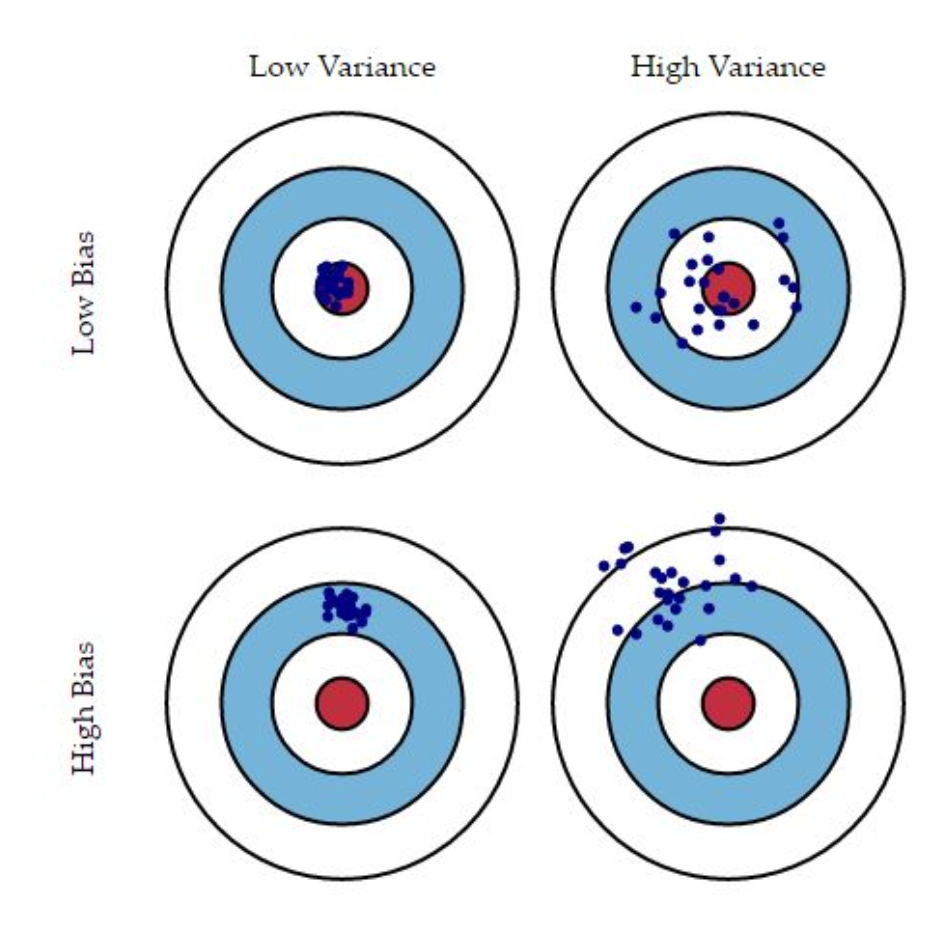

In [3]:
Image("bias-variance1.png")

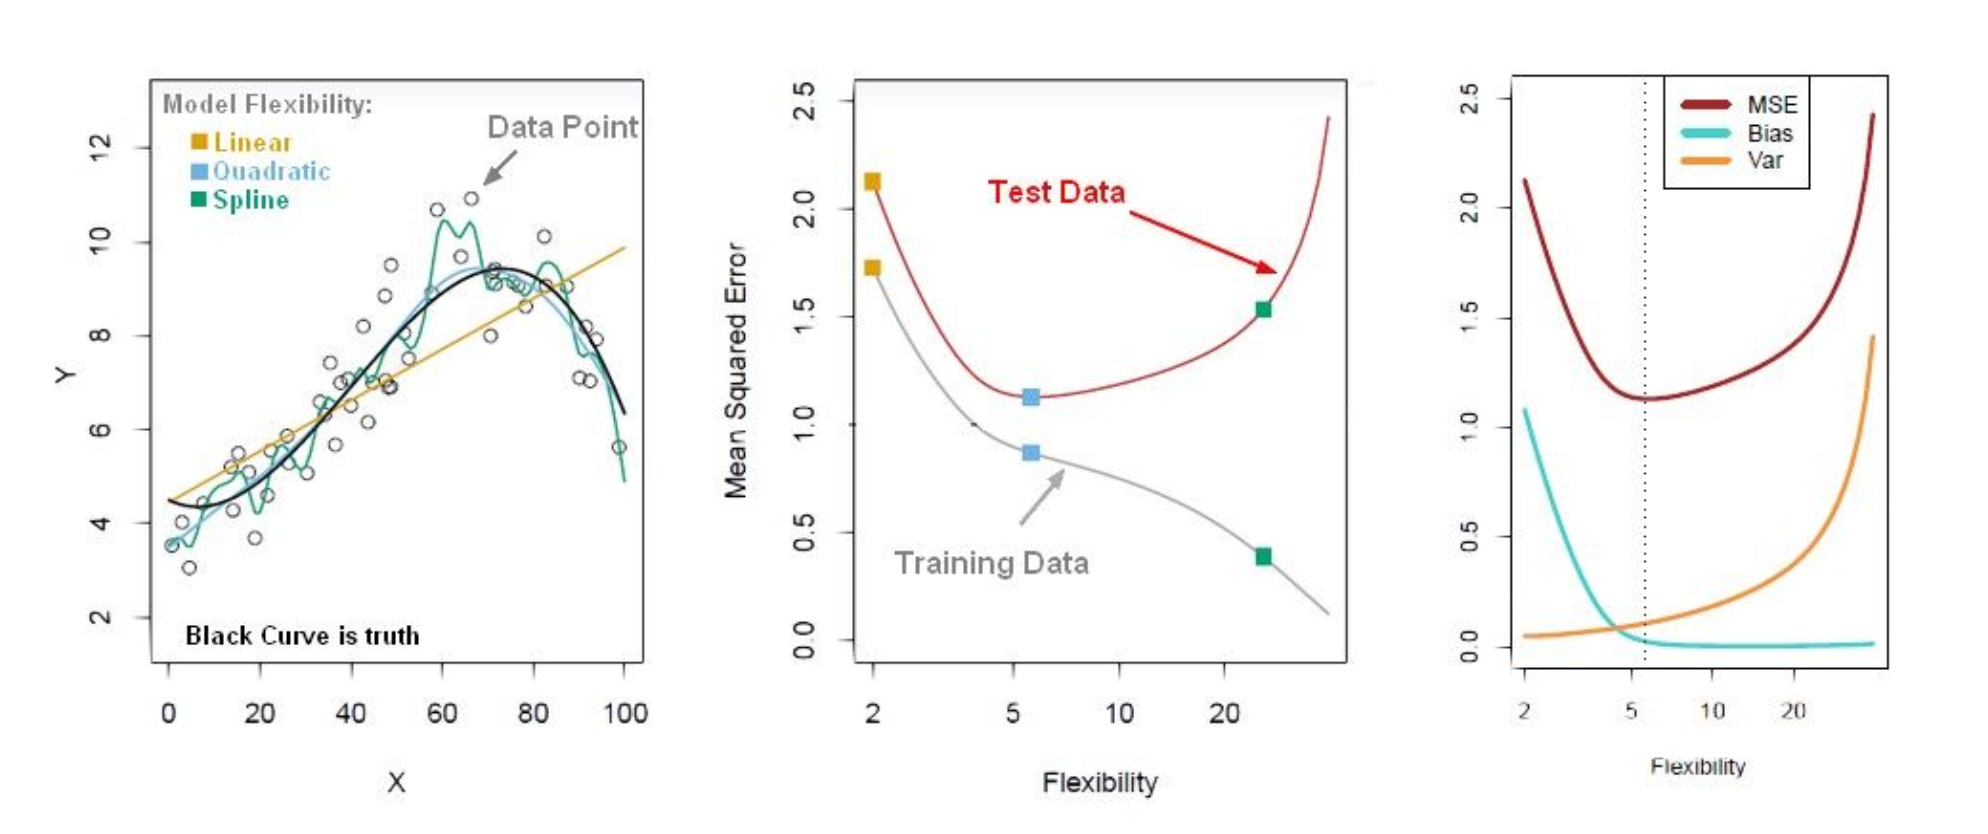

In [4]:
Image("bias-variance2.png")

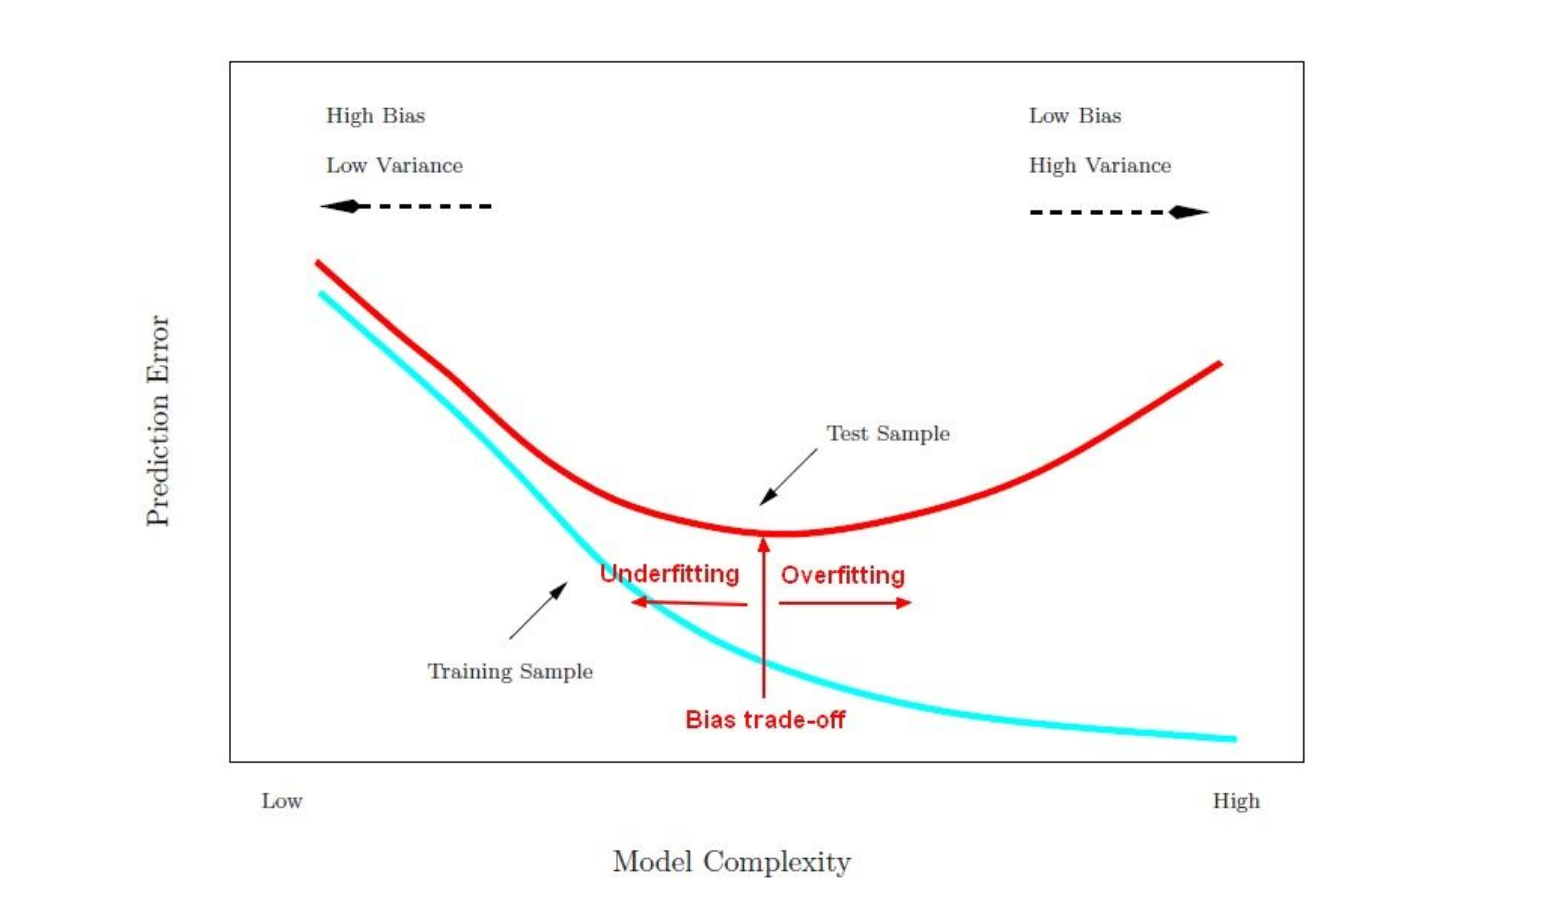

In [5]:
Image("bias-variance3.png")

### Logistic Regression
- Is a ML algorithm used for classification problems e.g the probability of defaulting on a loan or not.
- While with linear regression, we predict contiunous values e.g house prices, with logistic regression we focus on binary classes and the determination of a 1 or 0 value, denoting whether an item belongs in a certain class or not.
- Linear regression cant be used on binary groups as it will not lead to a good fit and may even yield -ve values which dont make sense.
- To implement logistic regression, we use the _Sigmoid function_ which takes in any value and outputs a corresponding 1 or 0.
- The Sigmoid function is:

$$\theta(z) = {{1}\over (1 + e^{-z})}$$

- We can use this function on a linear model's prediction to yield binary corresponding values (between 0 and 1), then set a cut-off e.g 0.5 then classify every value below it in the 0 class and every value above it in the 1 class.

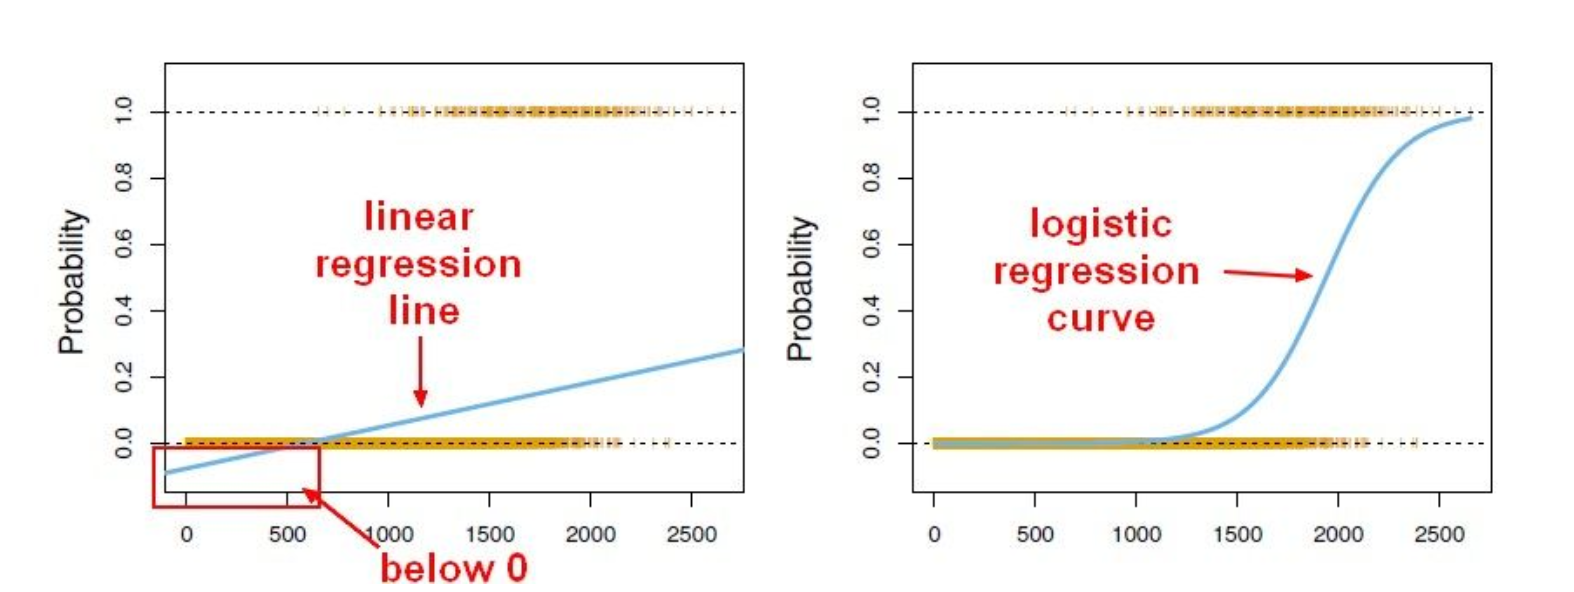

In [6]:
Image("13-Logistic-Regression/linear-vs-logistic.png")

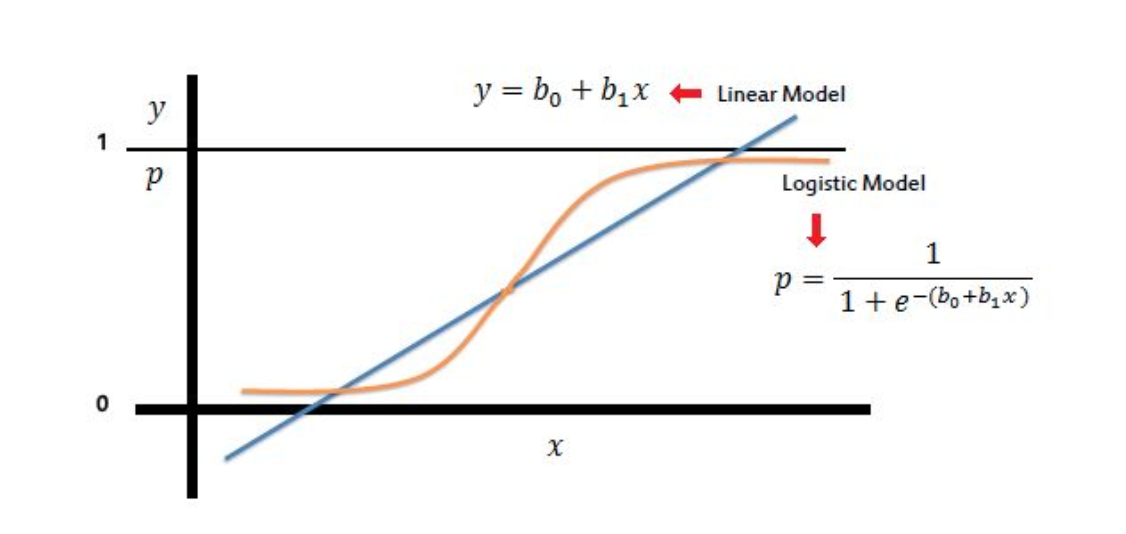

In [7]:
Image("13-Logistic-Regression/fit-linear-logistic.png")

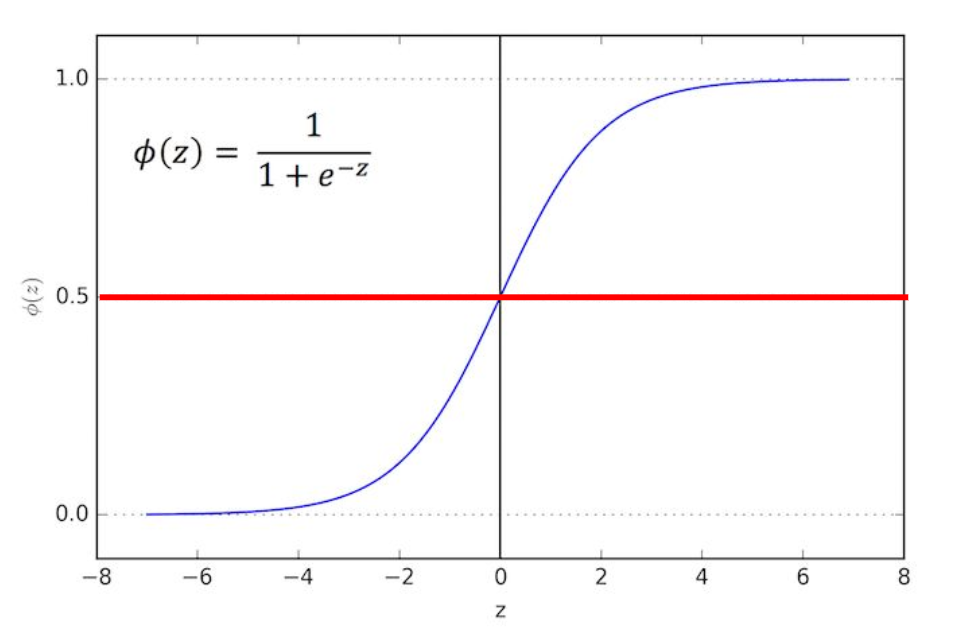

In [9]:
Image("13-Logistic-Regression/logistic-classification.png")

### Using a Confusion Matrix to evaluate classification models
- If predicting for the presence of a disease, we can have 2 outcomes:

    1. YES = positive test = True = 1
    2. NO = negative test = False = 0

- Considering the below confusion matrix:

|n=165|Predicted:NO|Prediction:YES||
|:---:|:---:|:---:|:---:|
|Actual:NO|TN = 50|FP = 10|60|
|Actual:YES|FN = 5|TP = 100|105|
||55|110||

Determine rates for the model performance:

1. Overall, how often is the model correct: in the above case 0.91/ 91%

$$Accuracy Rate = {{TP + TN}\over sample size (n)}$$

2. Overall, how often is the model wrong: in the above case 0.09/ 9%

$$Misclassification Rate = {{FP + FN}\over sample size (n)}$$

### K Nearest Neighbour (KNN)

- Is a classficiation algorithm that operates on the principle of classifying (predicting where which class they belong to) new data points based on the surrounidng data points classification (See illustration 1).
- The traiing algorithm involves storing fearure data.
- The prediction algorithm invloves: 
    - Calculating the distance from the new point X to all the points in the training data.
    - Sorting the traing data by increasing distance from X.
    - Predicting the majority label (class to belong to of the new data point) of the K (the number of  neigbouring points to consider for the classification) closest points. (See illustration 2).

- Pros of this algorithm:
    - Simple
    - Training is trivial
    - Works with any number of classes
    - Easy to add more data
    - Few parameters (K & distance metric)
    
- Cons:
    - High prediction cost especially for large data sets due to the sorting process
    - Not good with high dimensional data (data with more features)
    - Does not work well with categorical feature (those with an either or value / state)

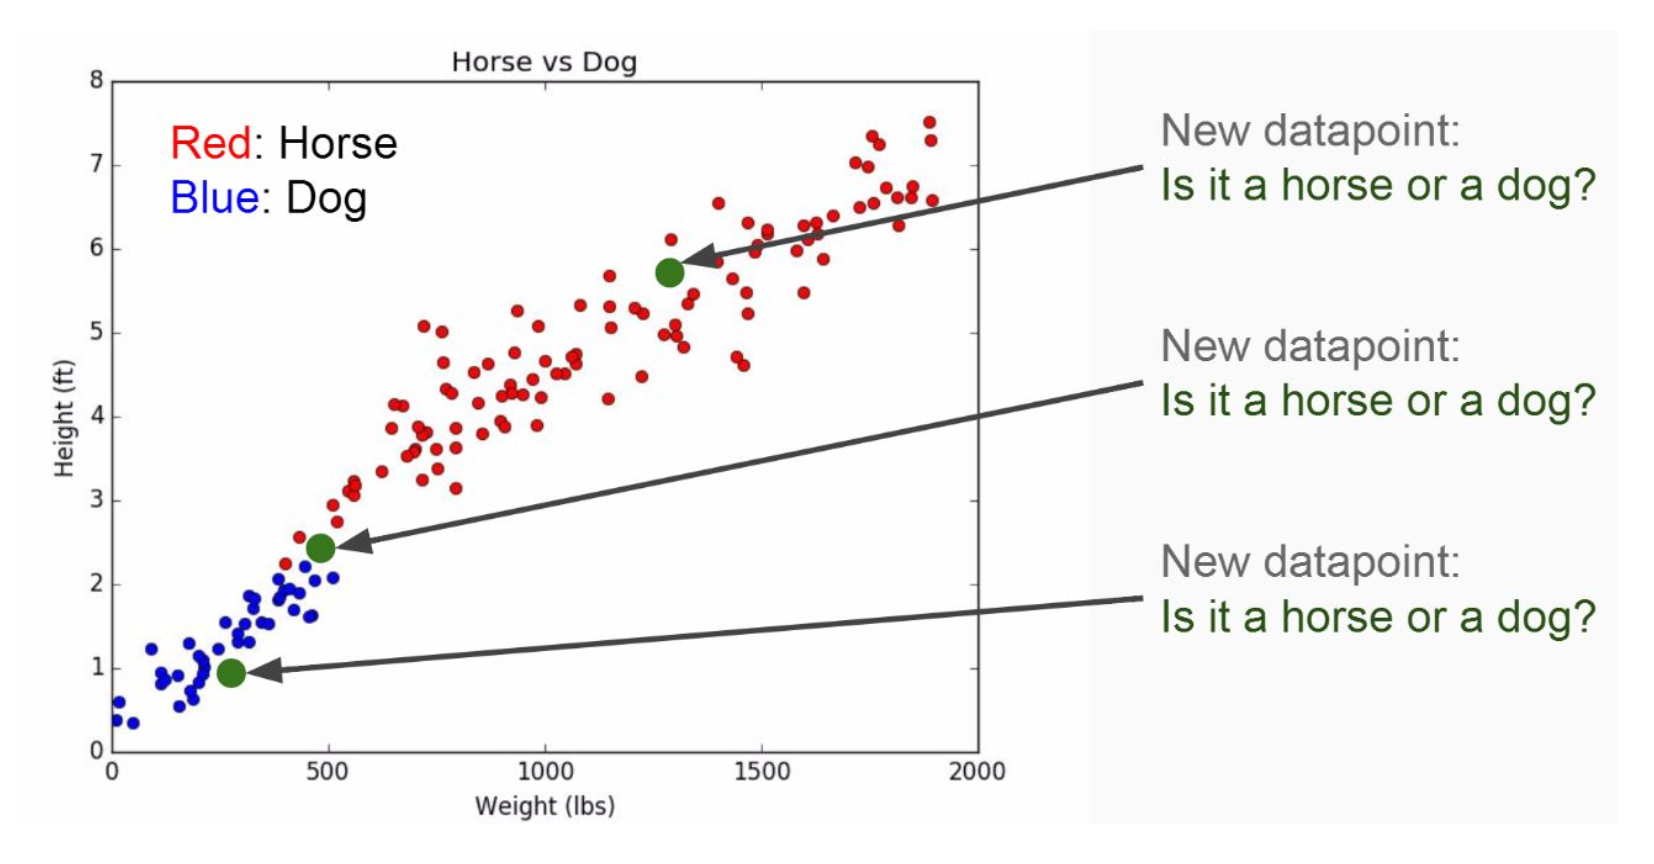

In [3]:
Image("14-K-Nearest-Neighbors/illustration 1.png")

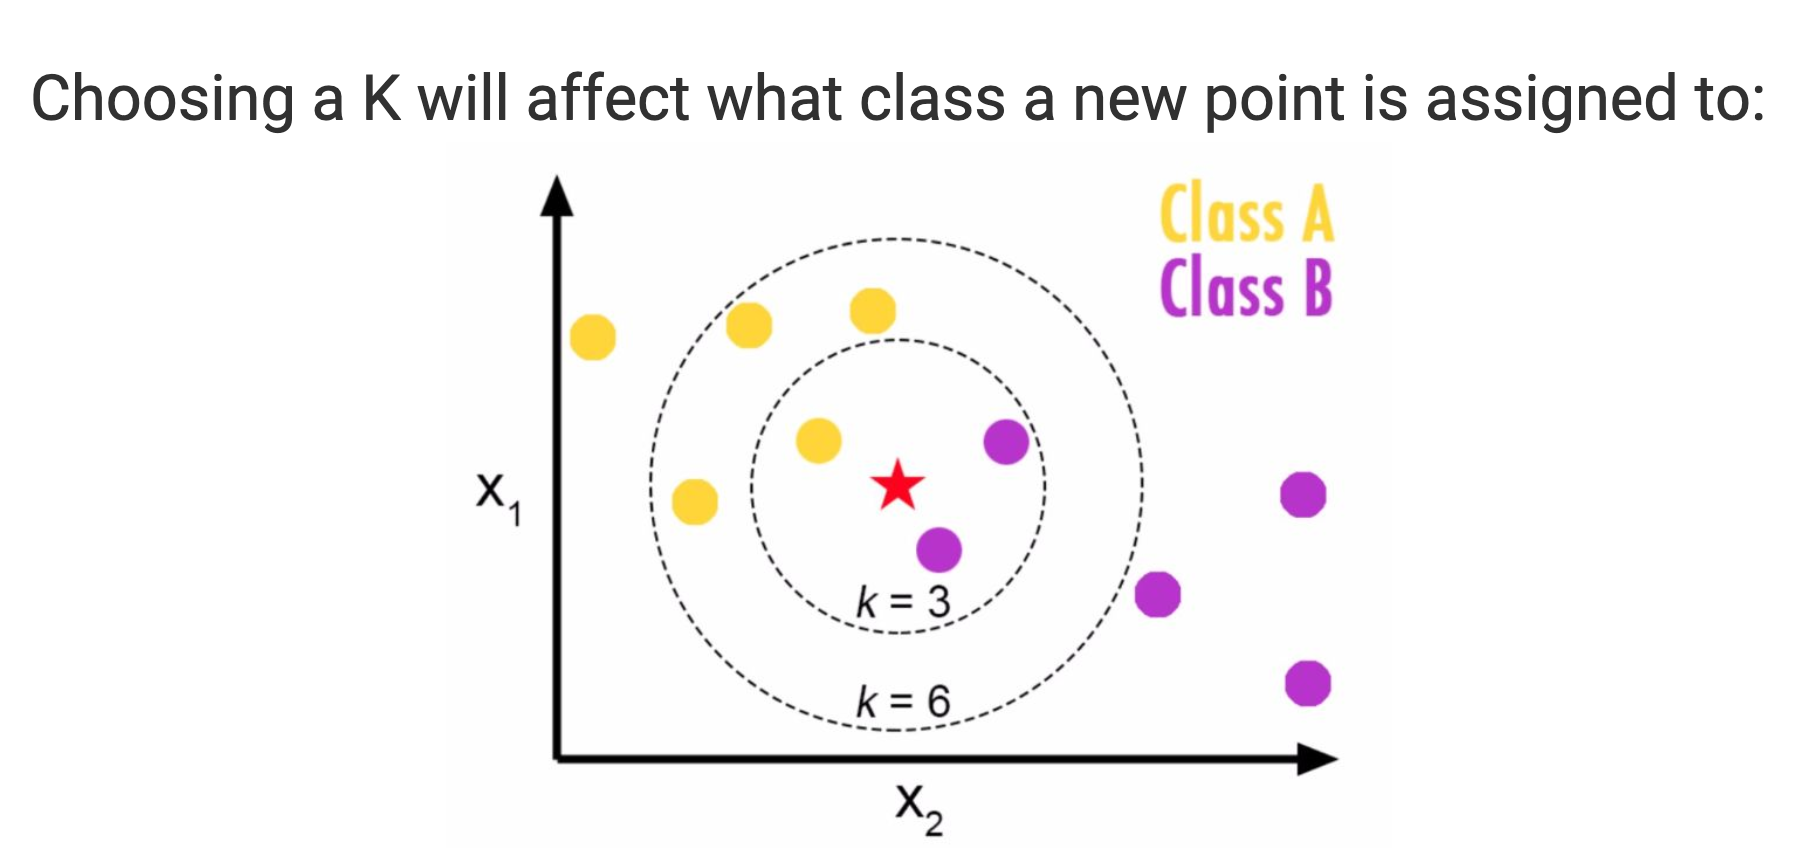

In [4]:
Image("14-K-Nearest-Neighbors/illustration 2.png")